GetDist Jupyter Notebook Plot Gallery
===============
Demonstrates the types of plot you can make with [GetDist](https://getdist.readthedocs.org) and how to make them. 
You can also [run this notebook online](https://mybinder.org/v2/gh/cmbant/getdist/master?filepath=docs%2Fplot_gallery.ipynb).

In [1]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.2.2, Matplotlib version: 3.3.4


In [2]:
# use this here *after* the above (instead of matplotlib inline) to use interactive plots
# %matplotlib notebook

In [3]:
# Get some random samples for demonstration:
# make random covariance, then independent samples from Gaussian
import numpy as np
ndim = 4
nsamp = 10000
random_state = np.random.default_rng(10) # seed random generator
A = random_state.random((ndim,ndim))
cov = np.dot(A, A.T)
samps = random_state.multivariate_normal([0]*ndim, cov, size=nsamp)
A = random_state.random((ndim,ndim))
cov = np.dot(A, A.T)
samps2 = random_state.multivariate_normal([0]*ndim, cov, size=nsamp)

In [4]:
# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
names = ["x%s"%i for i in range(ndim)]
labels =  ["x_%s"%i for i in range(ndim)]
samples = MCSamples(samples=samps,names = names, labels = labels)
samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')

Removed no burn in
Removed no burn in


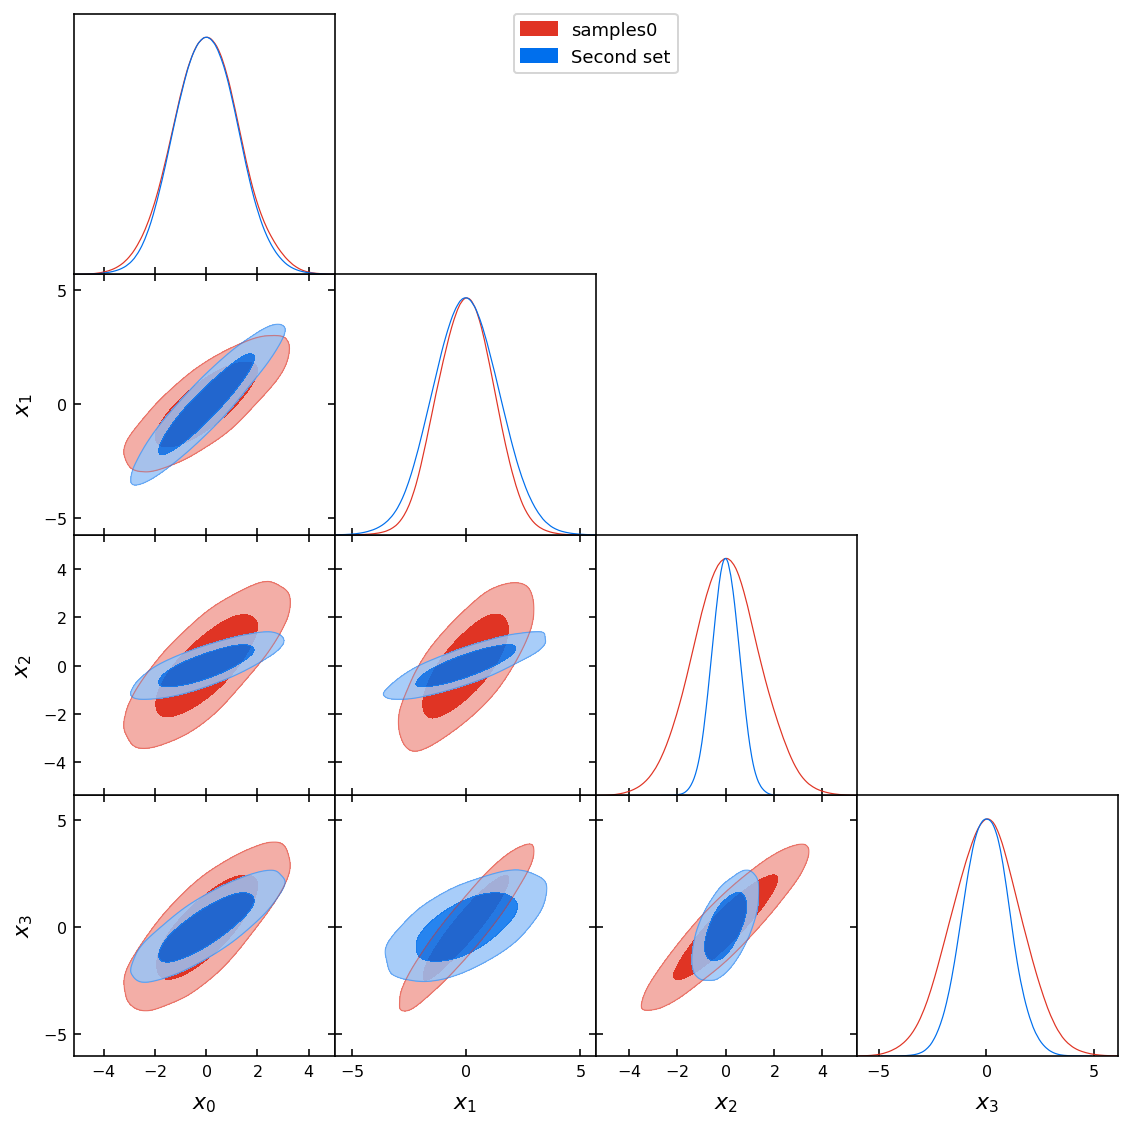

In [5]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples, samples2], filled=True)

In [6]:
# Here we are using inline plots, but if you wanted to export to file you'd just do e.g.
# g.export('output_file.pdf')

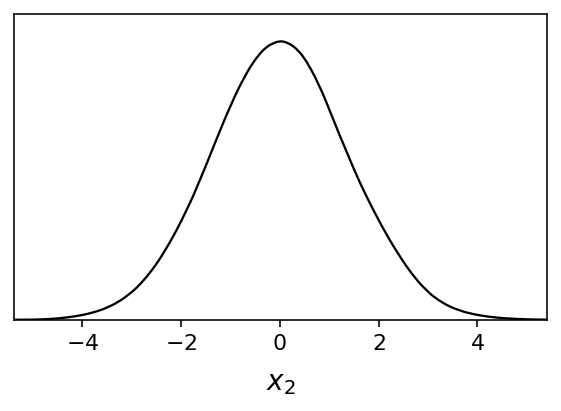

In [7]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d(samples, 'x2')


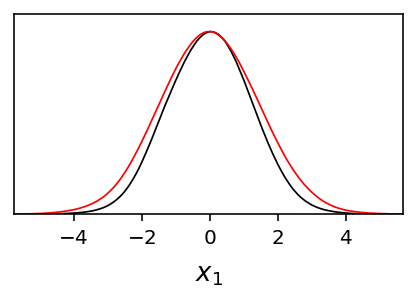

In [8]:
# 1D marginalized comparison plot
g = plots.get_single_plotter(width_inch=3)
g.plot_1d([samples, samples2], 'x1')

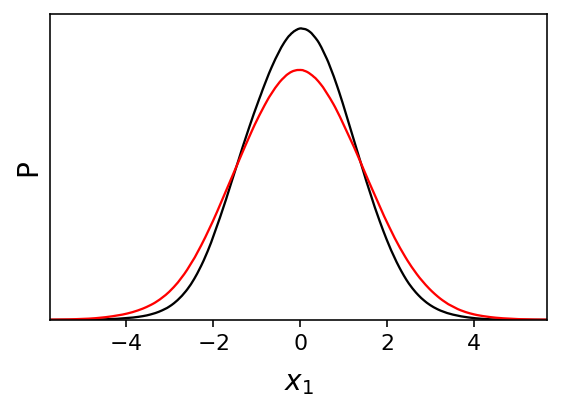

In [9]:
# 1D normalized comparison plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samples, samples2], 'x1', normalized=True)

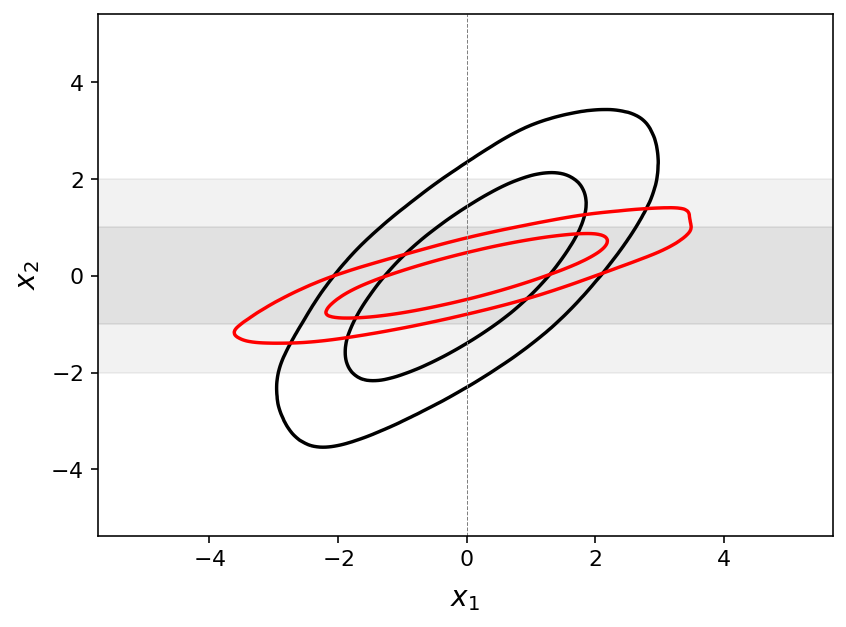

In [10]:
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples, samples2], 'x1', 'x2')
g.add_x_marker(0)
g.add_y_bands(0, 1)

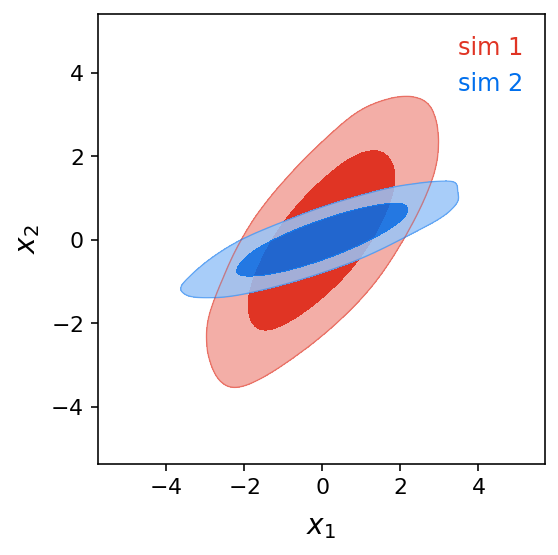

In [11]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True)
g.add_legend(['sim 1', 'sim 2'], colored_text=True);

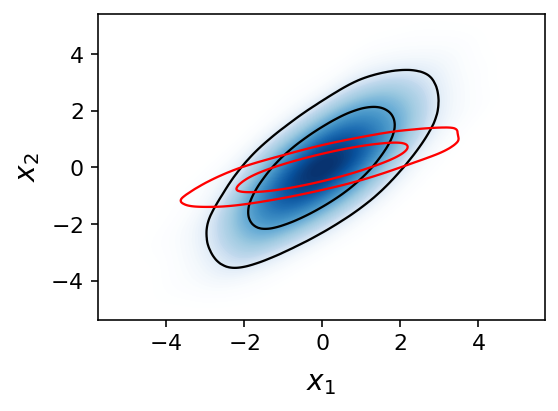

In [12]:
# Shaded 2D comparison plot
g = plots.get_single_plotter(width_inch=4)
g.plot_2d([samples, samples2], 'x1', 'x2', shaded=True);

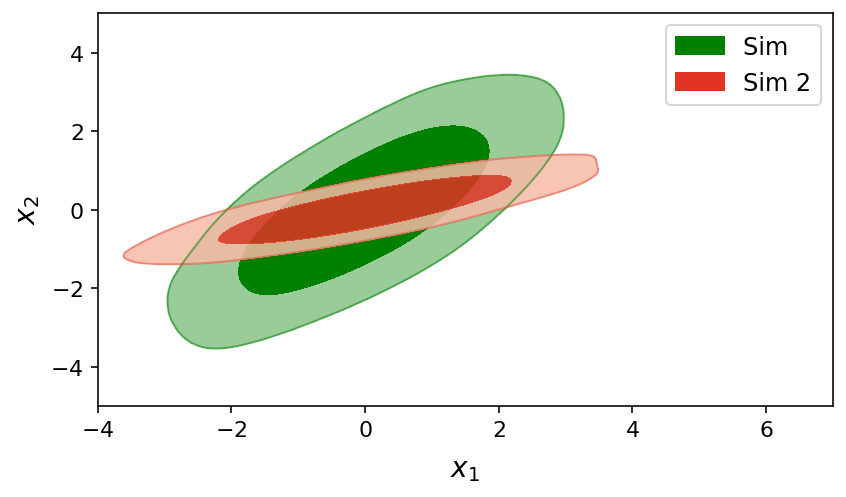

In [13]:
# Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=3 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True, 
    colors=['green', ('#F7BAA6', '#E03424')], lims=[-4, 7, -5, 5])
g.add_legend(['Sim ', 'Sim 2'], legend_loc='upper right');

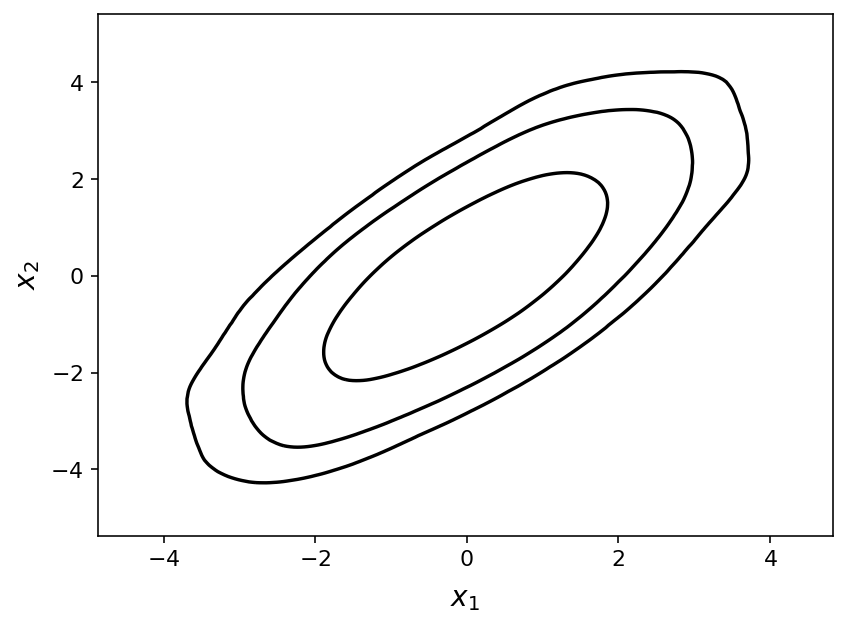

In [14]:
# Change the contours levels for marge stats and plots
# (note you need a lot of samples for 99% confidence contours to be accurate)
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 3
g.plot_2d(samples, 'x1', 'x2');

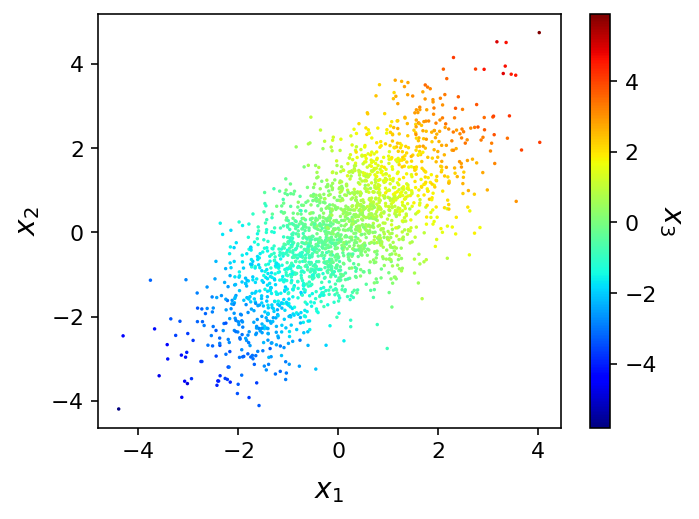

In [15]:
# 2D scatter (3D) plot
g = plots.get_single_plotter(width_inch=5)
g.plot_3d(samples, ['x1', 'x2', 'x3'])

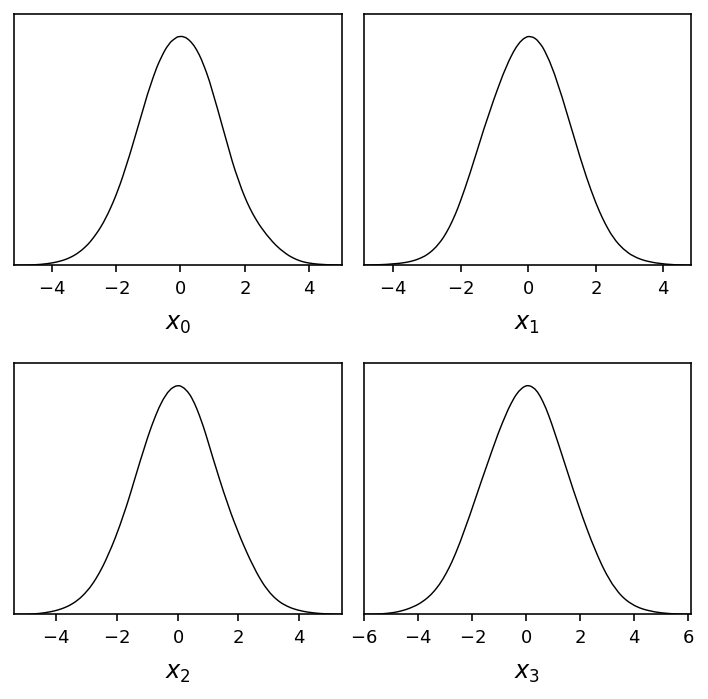

In [16]:
# Multiple 1D subplots
g = plots.get_subplot_plotter(width_inch=5)
g.plots_1d(samples, ['x0', 'x1', 'x2', 'x3'], nx=2);

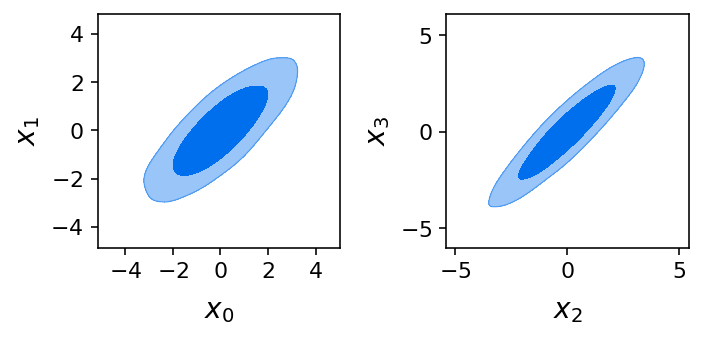

In [17]:
# Multiple 2D subplots
g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = False # prevent scaling down font sizes even though small subplots
g.plots_2d(samples, param_pairs=[['x0', 'x1'], ['x2', 'x3']], 
           nx=2, filled=True);

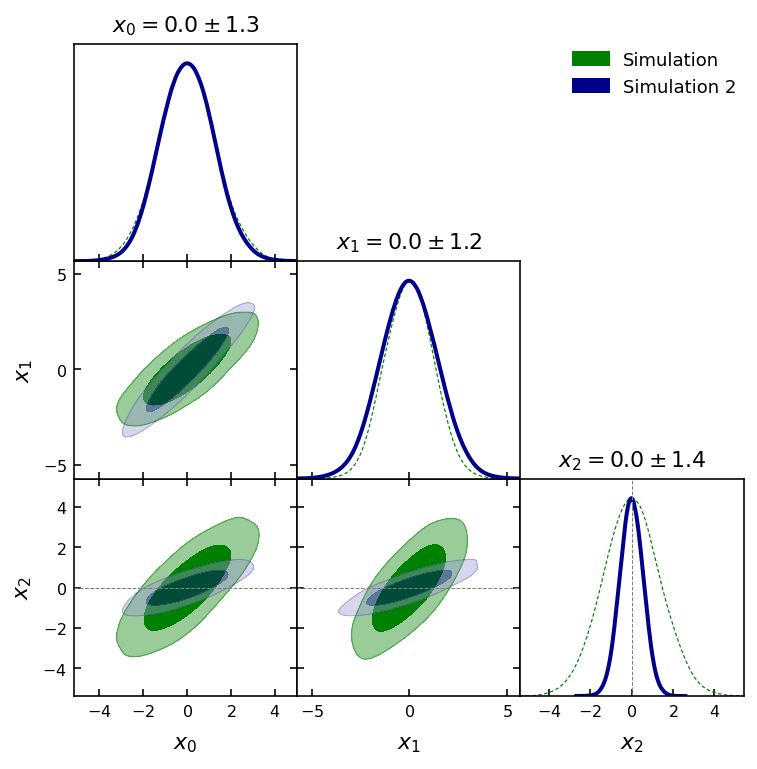

In [18]:
# Customized triangle plot
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot([samples, samples2], ['x0', 'x1', 'x2'], 
    filled=True, 
    legend_labels=['Simulation', 'Simulation 2'], 
    legend_loc='upper right', 
    line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}], 
    contour_colors=['green','darkblue'],
    title_limit=1, # first title limit (for 1D plots) is 68% by default
    markers={'x2':0})

---
If you prefer to use one of the standard color series you can do that, using the matplotlib [named colormaps](https://matplotlib.org/examples/color/colormaps_reference.html) 


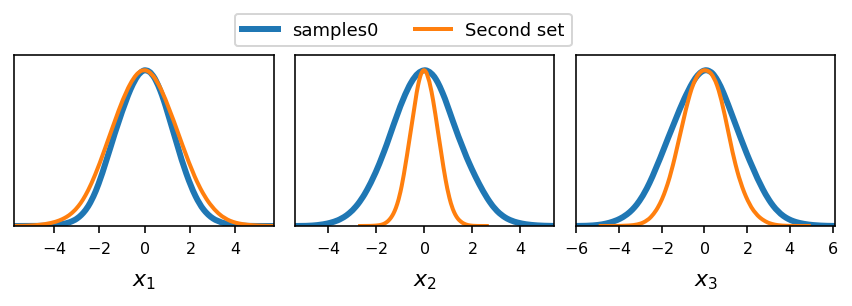

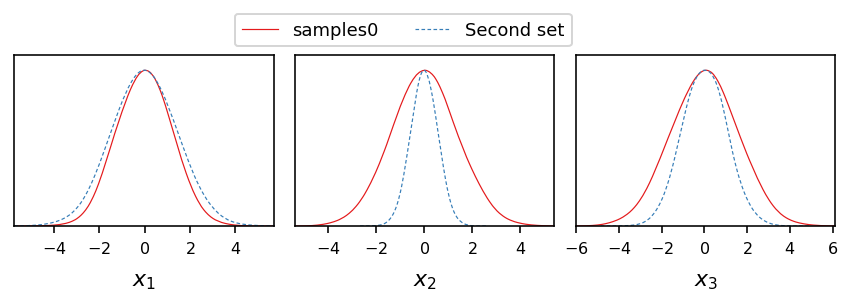

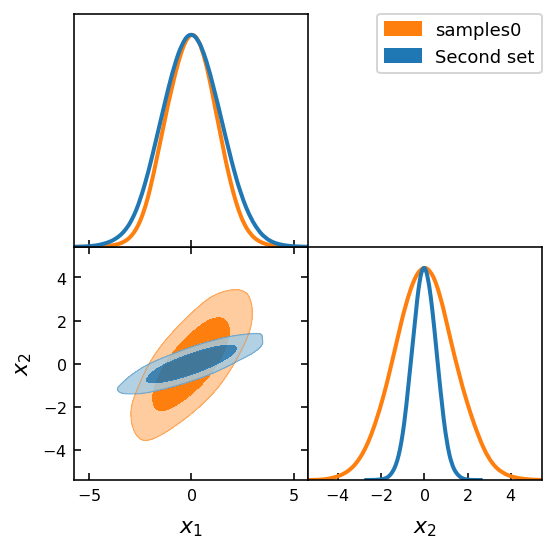

In [19]:
# tab10 is the standard discrete color table (good for color blindness etc.)
g = plots.get_subplot_plotter(subplot_size=2)

# Set line style default
g.settings.line_styles = 'tab10'
g.plots_1d([samples, samples2], ['x1','x2', 'x3'], nx=3, legend_ncol=2, lws=[3,2])

# or set expliclicitly
g.plots_1d([samples, samples2], ['x1','x2', 'x3'], nx=3, legend_ncol=2,colors='Set1', ls=['-','--'])

# For filled contours set solid_colors setting (or set contour_colors argument as above)
g.settings.solid_colors='tab10'
g.triangle_plot([samples, samples2],  ['x1','x2'], filled=True, contour_lws=2) 

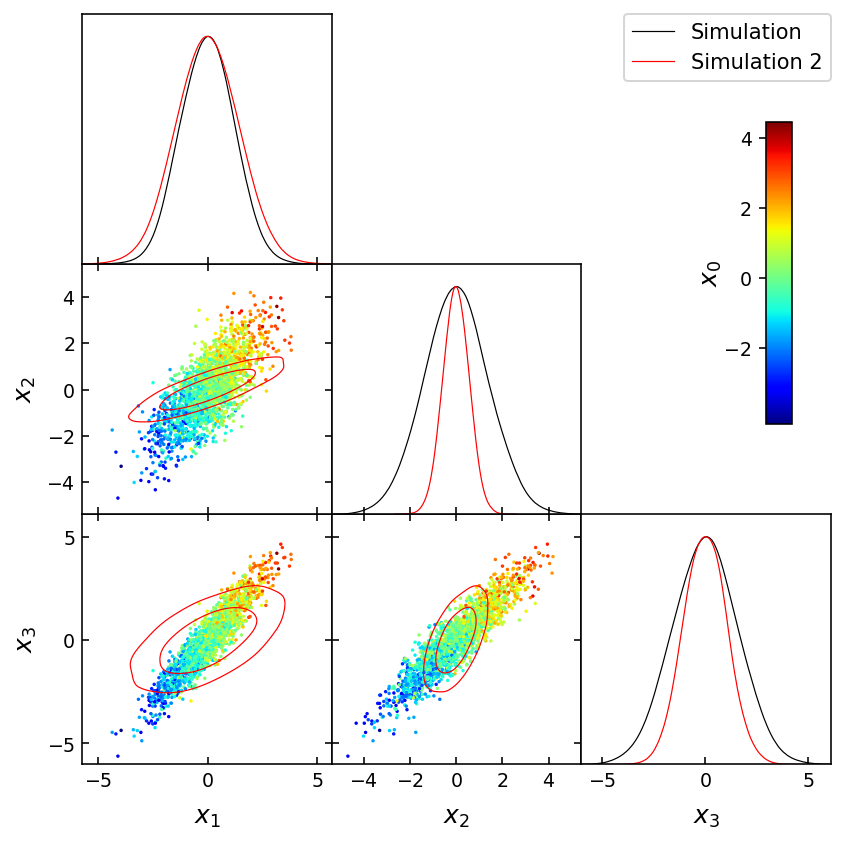

In [20]:
# 3D (scatter) triangle plot
g = plots.get_subplot_plotter(width_inch=6)
# you can adjust the scaling factor if font sizes are too small when
# making many subplots in a fixed size (default=2 would give smaller fonts)
g.settings.scaling_factor = 1
g.triangle_plot([samples, samples2], ['x1', 'x2', 'x3'], 
                plot_3d_with_param='x0', legend_labels=['Simulation', 'Simulation 2'])

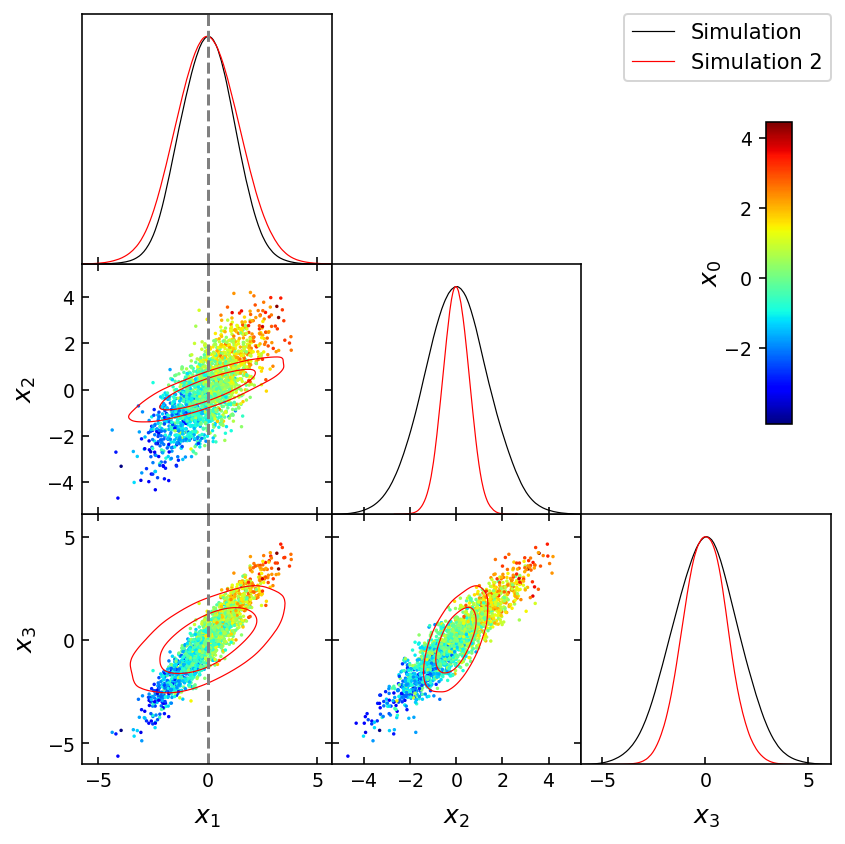

In [21]:
# You can reference g.subplots for manual tweaking, 
# e.g. let's add a vertical axis line in the first column 
# (this can also be done directly via the markers argument to triangle_plot)
for ax in g.subplots[:,0]:
    ax.axvline(0, color='gray', ls='--')
IPython.display.display(g.fig)

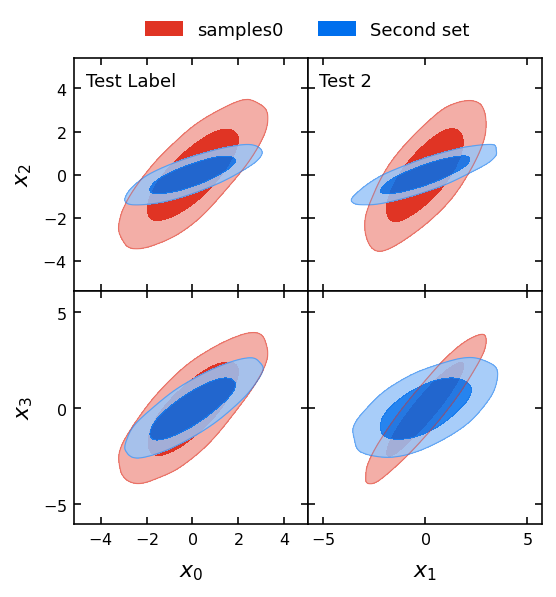

In [22]:
# Rectangle 2D comparison plots
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.rectangle_plot(['x0', 'x1'], ['x2', 'x3'], 
    roots=[samples, samples2], filled=True, 
    plot_texts=[['Test Label', None], ['Test 2', None]]);

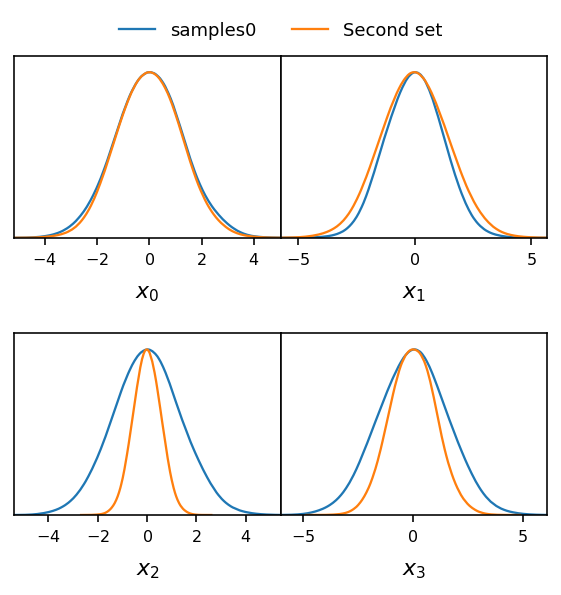

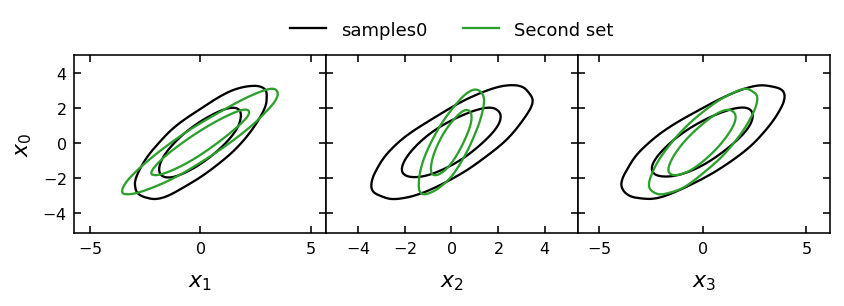

In [23]:
# Or join rows of 1D or 2D plots. 
from matplotlib import cm
g.settings.linewidth=2
g.plots_1d([samples,samples2], share_y=True, nx=2, legend_ncol=2, colors=cm.tab10)

g.rectangle_plot(['x1','x2','x3'],'x0', roots=[samples,samples2], colors=['k','C2']);

Removed no burn in


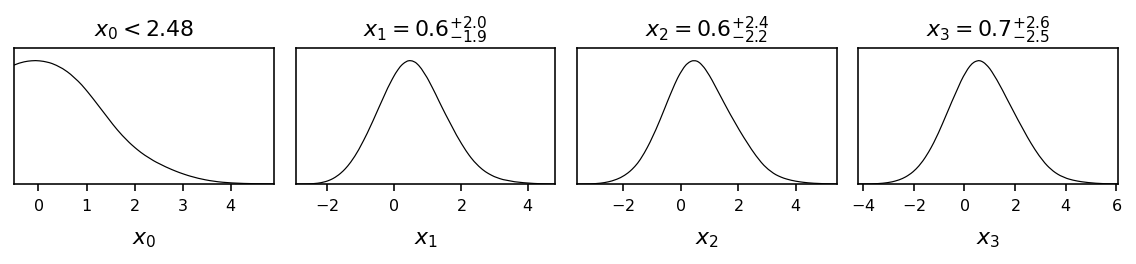

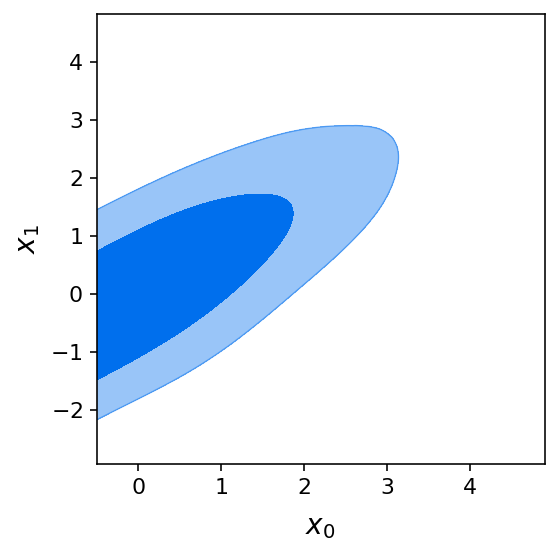

In [24]:
# Example of how to handle boundaries (samples are restricted to x0 >-0.5)
cut_samps = samps[samps[:,0]>-0.5,:]
cut_samples = MCSamples(samples=cut_samps, names = names, labels = labels, 
                        ranges={'x0':(-0.5, None)}, label='Cut samples')
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.title_limit_fontsize = 14 # reference size for 3.5 inch subplot
g.plots_1d(cut_samples,nx=4, title_limit=2) # title by 95% limit
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d(cut_samples, 'x0', 'x1', filled=True);

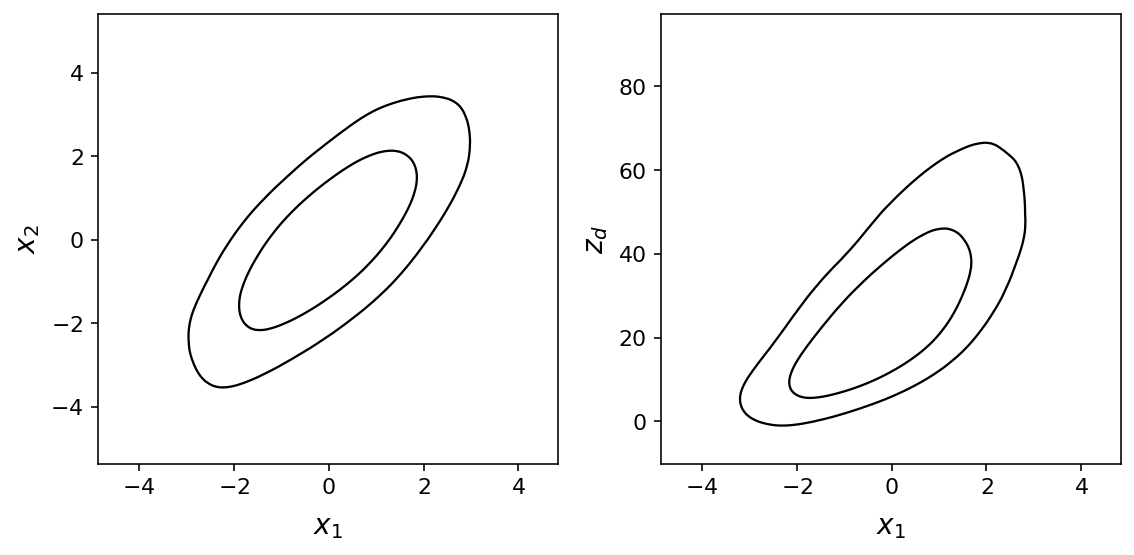

In [25]:
# Add and plot a new derived parameter
# getParms gets p so that p.x0, p.x1.. are numpy vectors of sample values
# For individual parameters you can also just do samples['x0'] etc.
p = samples.getParams() 
assert np.all(p.x1 == samples['x1'])
samples.addDerived((5+p.x2)** 2, name='z', label='z_d')
g = plots.get_subplot_plotter(subplot_size=4)
g.plots_2d(samples,'x1',['x2','z'], nx=2);

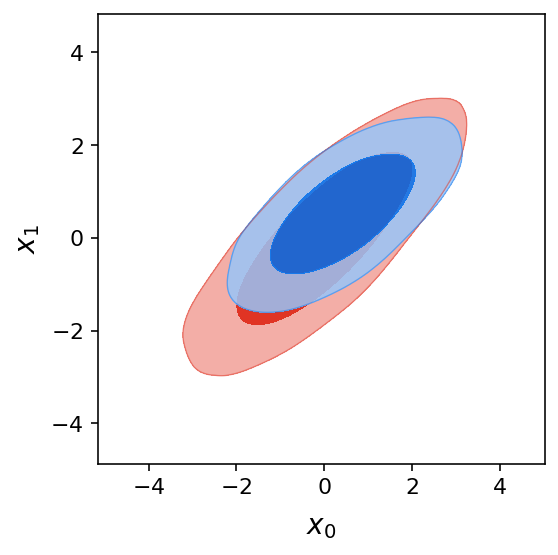

In [26]:
# Example of how to do importance sampling, modifying the samples by re-weighting by a new likelihood
# e.g. to modify samples to be from the original distribution times a Gaussian in x1 
# (centered on 1, with sigma=1.2)
# Using samples['x'] retrieves the vector of sample values for the parameter named 'x'
new_samples = samples.copy() # make a copy so don't change the original
new_loglike = (samples['x1']-1)**2/1.2**2/2
# code currently assumes existing loglikes are set, set to zero here
new_samples.loglikes = np.zeros(samples.numrows) 
# re-weight to account for the new likelihood
new_samples.reweightAddingLogLikes(new_loglike) 
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([samples,new_samples], 'x0', 'x1', filled=True);

In [27]:
# Many other things you can do besides plot, e.g. get latex
# Default limits are 1: 68%, 2: 95%, 3: 99% probability enclosed
# See  https://getdist.readthedocs.io/en/latest/analysis_settings.html
# and examples for below for changing analysis settings 
# (e.g. 2hidh limits, and how they are defined)
print(cut_samples.getInlineLatex('x0',limit=2))
print(samples.getInlineLatex('x0',limit=2))

x_0 < 2.48
x_0 = 0.0^{+2.6}_{-2.6}


In [28]:
print(samples.getInlineLatex('x1',limit=1))

x_1 = 0.0\pm 1.2


In [29]:
print(samples.getTable().tableTex())

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$x_0            $} & $0.0^{+2.6}_{-2.6}         $\\

{\boldmath$x_1            $} & $0.0^{+2.4}_{-2.4}         $\\

{\boldmath$x_2            $} & $0.0^{+2.7}_{-2.7}         $\\

{\boldmath$x_3            $} & $0.0^{+3.1}_{-3.1}         $\\

$z_d                       $ & $27^{+30}_{-20}            $\\
\hline
\end{tabular}


In [30]:
print(samples.PCA(['x1','x2']))

PCA for parameters:
         2 :x_1
         3 :x_2

Correlation matrix for reduced parameters
          x1 :  1.0000  0.7303
          x2 :  0.7303  1.0000

e-values of correlation matrix
PC 1:   0.2697
PC 2:   1.7303

e-vectors
  2: -0.7071  0.7071
  3:  0.7071  0.7071

Principle components
PC1 (e-value: 0.269710)
[1.229952]   (x_1-0.000555)/1.000000)
[-1.229952]   (x_2-0.003484)/-1.137321)
          = -0.000000 +- 0.903342

PC2 (e-value: 1.730290)
[1.398851]   (x_1-0.000555)/0.879259)
[1.398851]   (x_2-0.003484)/1.000000)
          = 0.000000 +- 2.602230

Correlations of principle components
       1       2
PC 1   1.000   0.000
PC 2   0.000   1.000
   1   0.029   0.834   (x_0)
   2   0.367   0.930   (x_1)
   3  -0.367   0.930   (x_2)
   4   0.018   0.990   (x_3)
   5  -0.363   0.912   (z_d)



In [31]:
stats = cut_samples.getMargeStats()
lims0 = stats.parWithName('x0').limits
lims1 = stats.parWithName('x1').limits
for conf, lim0, lim1 in zip(samples.contours,lims0, lims1):
    print('x0 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim0.lower, lim0.upper, lim0.limitType()))
    print('x1 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
       

x0 0.68% lower: -0.500 upper: 1.063 (one tail upper limit)
x1 0.68% lower: -0.493 upper: 1.491 (two tail)
x0 0.95% lower: -0.500 upper: 2.481 (one tail upper limit)
x1 0.95% lower: -1.382 upper: 2.532 (two tail)
x0 0.99% lower: -0.500 upper: 3.257 (one tail upper limit)
x1 0.99% lower: -1.792 upper: 3.371 (two tail)


In [32]:
# Save to file
import tempfile, os
tempdir = os.path.join(tempfile.gettempdir(),'testchaindir')
if not os.path.exists(tempdir): 
    os.makedirs(tempdir)
rootname = os.path.join(tempdir, 'testchain')
samples.saveAsText(rootname)

In [33]:
# Load from file
from getdist import loadMCSamples
readsamps = loadMCSamples(rootname)

C:\Users\Antony\AppData\Local\Temp\testchaindir\testchain.txt
Removed no burn in


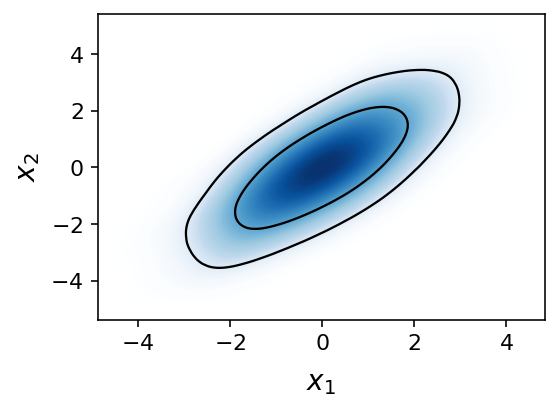

In [34]:
# Make plots from chain files, loading automatically as needed by using root file name
g = plots.get_single_plotter(chain_dir=tempdir, width_inch=4)
g.plot_2d('testchain','x1', 'x2', shaded=True);

C:\Users\Antony\AppData\Local\Temp\testchaindir\testchain.txt
Removed 0.2 as burn in


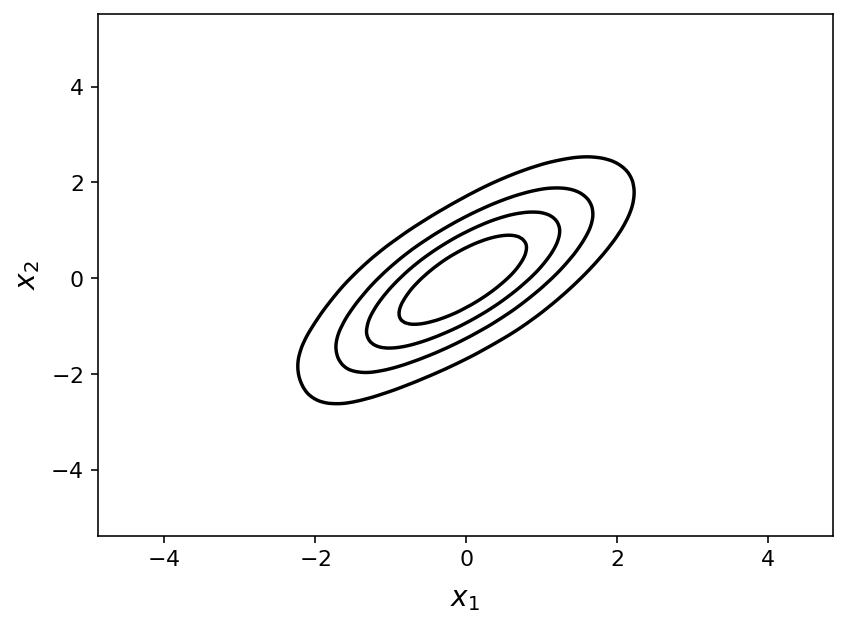

In [35]:
# Custom settings for all loaded chains can be set as follows;
# for example to use custom contours and remove the first 20% of each chain as burn in
g = plots.get_single_plotter(chain_dir=tempdir, 
            analysis_settings={'ignore_rows': 0.2, 'contours':[0.2, 0.4, 0.6, 0.8]});
g.settings.num_plot_contours = 4
g.plot_2d('testchain', 'x1', 'x2', filled=False);


In [36]:
# Silence messages about load
getdist.chains.print_load_details = False

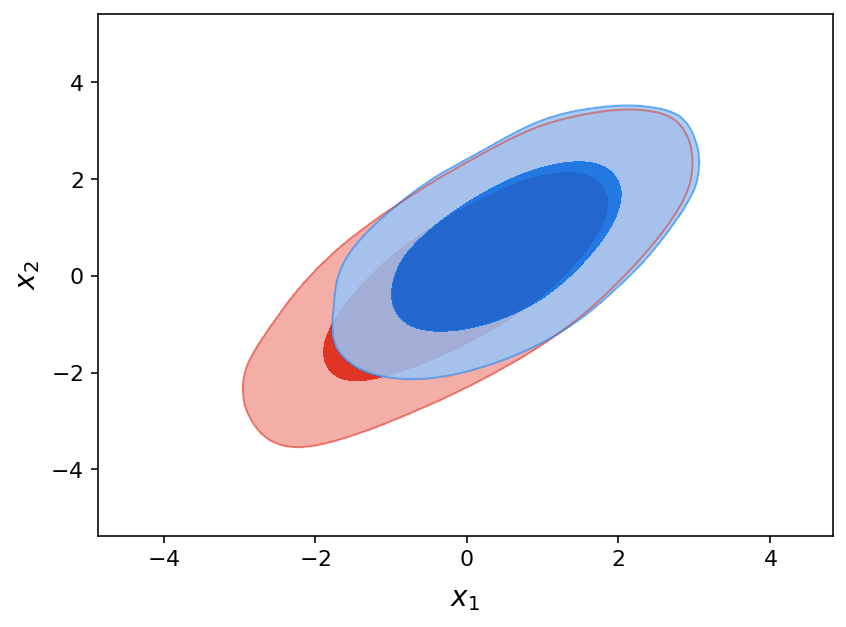

In [37]:
# Chains can be loaded by searching in multiple directories by giving a list as chain_dir
# (note chain names must be unique)

# make second test chain in new temp dir
temp2 = os.path.join(tempdir,'chaindir2')
cut_samples.saveAsText(os.path.join(temp2, 'testchain2'), make_dirs=True)
# Plot from chain files
g = plots.get_single_plotter(chain_dir=[tempdir, temp2])
g.plot_2d(['testchain','testchain2'], 'x1', 'x2', filled=True);

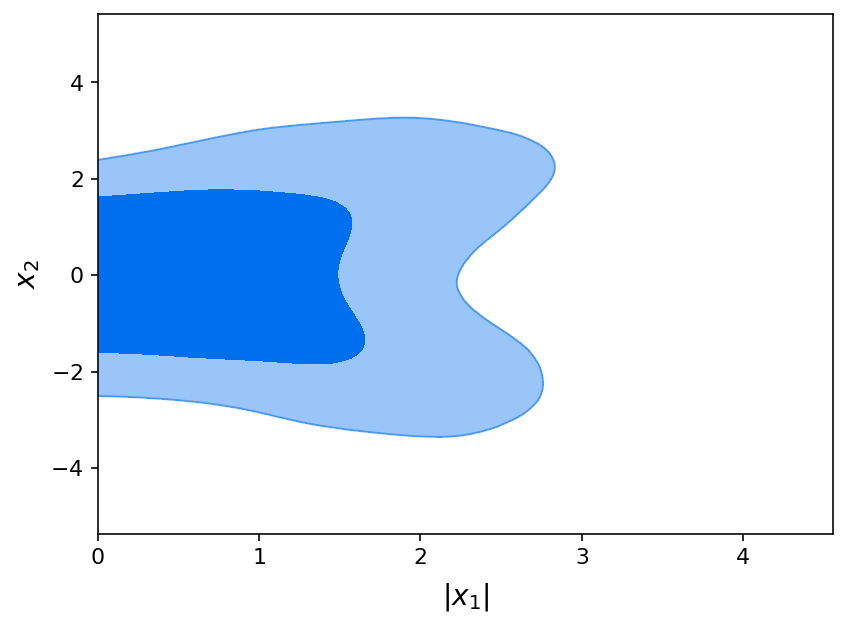

In [38]:
# You can also load a samples object from the chain directories for further manipulation
read_samples = g.samples_for_root('testchain')
# e.g. add a new derived parameter
# Note our new variable is >0 by definition, so also need to define its finite range to 
# get correct densities near zero
p=read_samples.getParams()
read_samples.addDerived(np.abs(p.x1), name='modx1', label='|x_1|', range=[0,None])
g.new_plot()
g.plot_2d(read_samples, 'modx1', 'x2', filled=True);

In [39]:
# cleanup test files
import shutil
shutil.rmtree(tempdir)

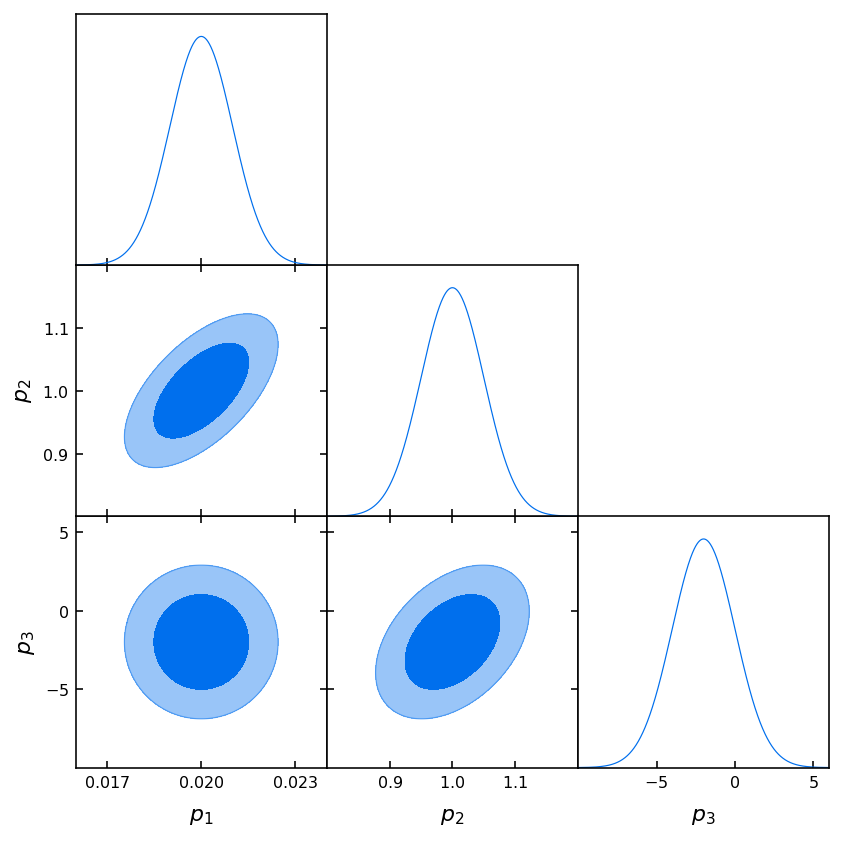

In [40]:
# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
covariance = [[0.001**2, 0.0006*0.05, 0], [0.0006*0.05, 0.05**2, 0.2**2], [0, 0.2**2, 2**2]]
mean = [0.02, 1, -2] 
gauss=GaussianND(mean, covariance)
g = plots.get_subplot_plotter()
g.triangle_plot(gauss,filled=True)


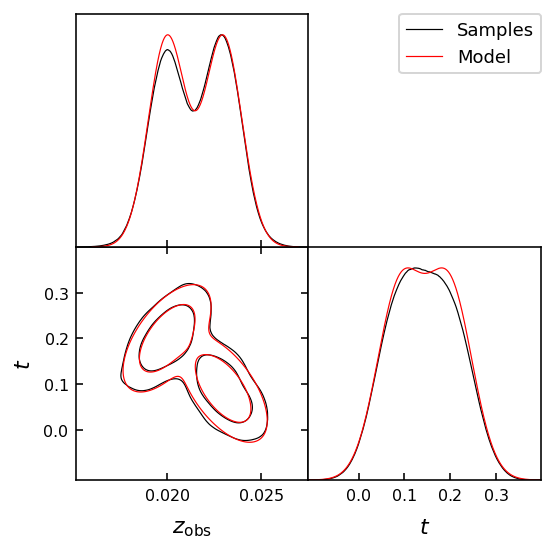

In [41]:
# You can also explicitly name parameters so Gaussian mixtures can be plotted 
#in combination with samples
from getdist.gaussian_mixtures import Mixture2D
cov1 = [[0.001**2, 0.0006*0.05], [0.0006*0.05, 0.05**2]]
cov2 = [[0.001**2, -0.0006*0.05], [-0.0006*0.05, 0.05**2]]
mean1 = [0.02, 0.2]
mean2 = [0.023, 0.09]
mixture=Mixture2D([mean1, mean2], [cov1, cov2], names=['zobs','t'], labels=[r'z_{\rm obs}', 't'], label='Model')

# Generate samples from the mixture as simple example
mix_samples = mixture.MCSamples(3000, label='Samples')

g = plots.get_subplot_plotter()
# compare the analytic mixture to the sample density
g.triangle_plot([mix_samples, mixture], filled=False)


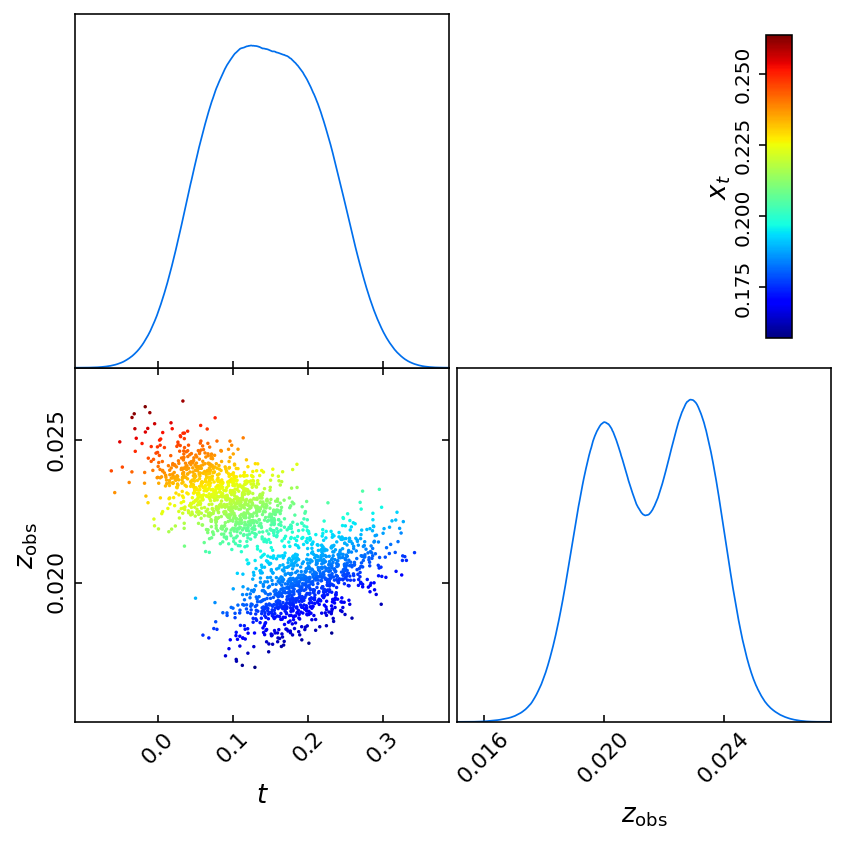

In [42]:
# For long tick labels GetDist will space them intelligently so they don't overlap. 
# You can also rotate tick labels
p=mix_samples.getParams()
mix_samples.addDerived(10*p.zobs-p.t/10, name='xt', label='x_t')

g = plots.get_subplot_plotter(subplot_size=3)
g.settings.axes_fontsize=12
g.settings.axis_tick_x_rotation=45
g.settings.axis_tick_y_rotation=90
g.settings.colorbar_tick_rotation=90
g.triangle_plot(mix_samples,['t','zobs'], plot_3d_with_param='xt' , filled=True)


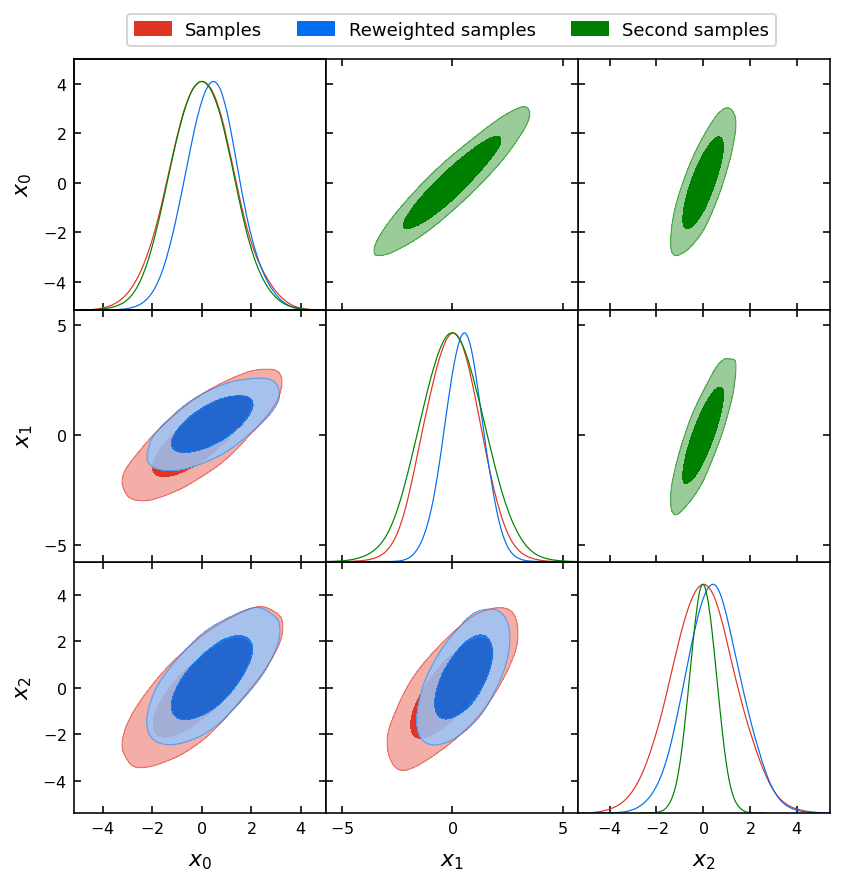

In [43]:
# Double triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples,new_samples], ['x0', 'x1', 'x2'], filled=True, 
                upper_roots = [samples2],
                upper_kwargs = {'contour_colors':['green']}, 
                legend_labels=['Samples','Reweighted samples','Second samples']);

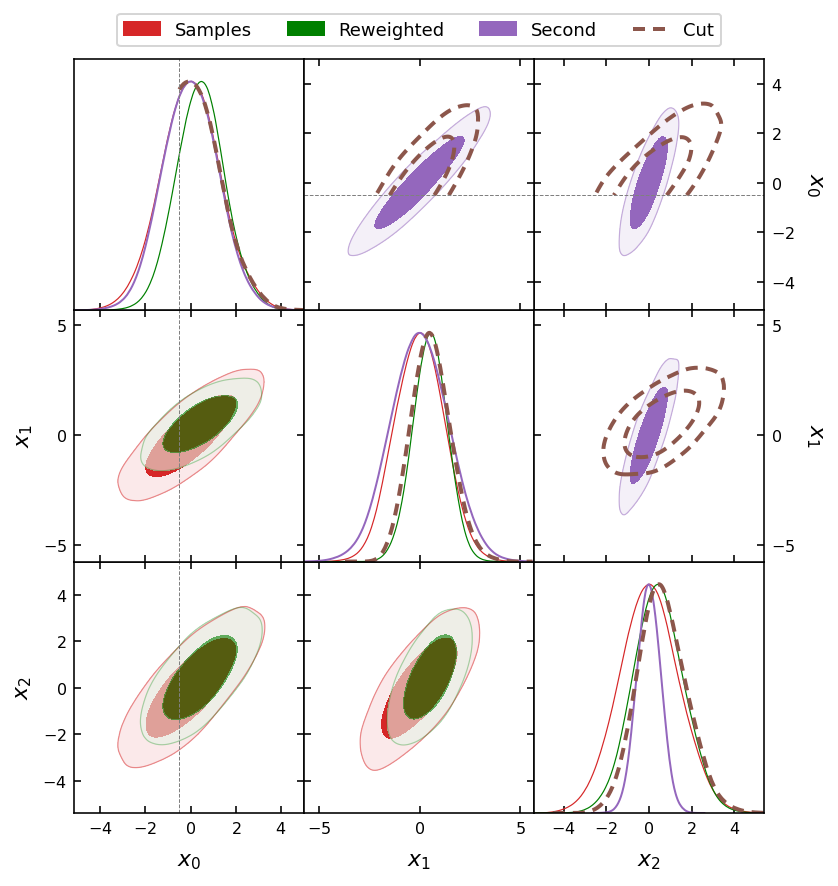

In [44]:
# Variants
g = plots.get_subplot_plotter()
from matplotlib import cm
upper_kwargs = {'contour_colors': cm.tab10.colors[4:], 'contour_ls': ['-', '--'], 
                'filled': [True, False], 'show_1d': [True, True], 'contour_lws':[1,2]}
g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6
g.triangle_plot([samples,new_samples], ['x0', 'x1', 'x2'], filled=True, 
                contour_colors=['C3','green'], markers={'x0':-0.5},
                upper_roots = [samples2, cut_samples],
                upper_kwargs = upper_kwargs, 
                upper_label_right=True,
                legend_labels=['Samples','Reweighted','Second', 'Cut']);

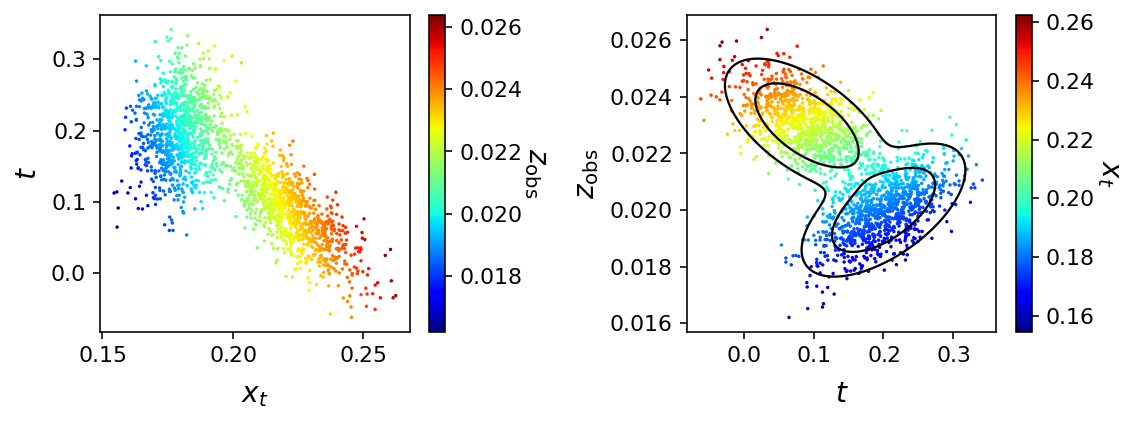

In [45]:
# Sets of 3D plots
g = plots.get_subplot_plotter(width_inch=8)
g.plots_3d(mix_samples,[['xt', 't','zobs'],['t', 'zobs','xt']], nx=2);
# and this is how to manually add contours only to a specific plot
g.add_2d_contours(mixture, 't','zobs', ax = [0,1]);

---
**Using styles to change settings for consistent plot scripts**

If you want to change several default settings, you can make a module containing a new 
plotter class, which defines its own settings and behaviour, and then use it as a style. 
A couple of sample styles are included: getdist.styles.tab10 and getdist.styles.planck.
Using the same style in each script will then give consistent outputs without changing settings
each time.

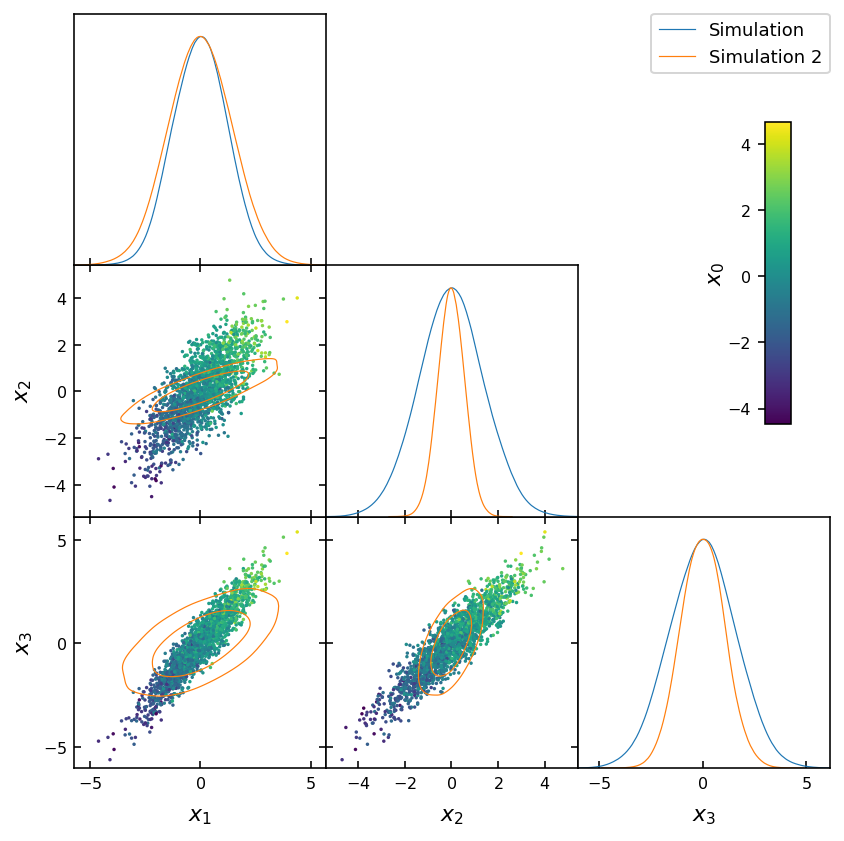

In [46]:
# use the 'tab10' style, which uses default matplotlib colourmaps
from getdist.styles.tab10 import style_name
plots.set_active_style(style_name)

g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([samples, samples2], ['x1', 'x2', 'x3'], 
                plot_3d_with_param='x0', legend_labels=['Simulation', 'Simulation 2'])


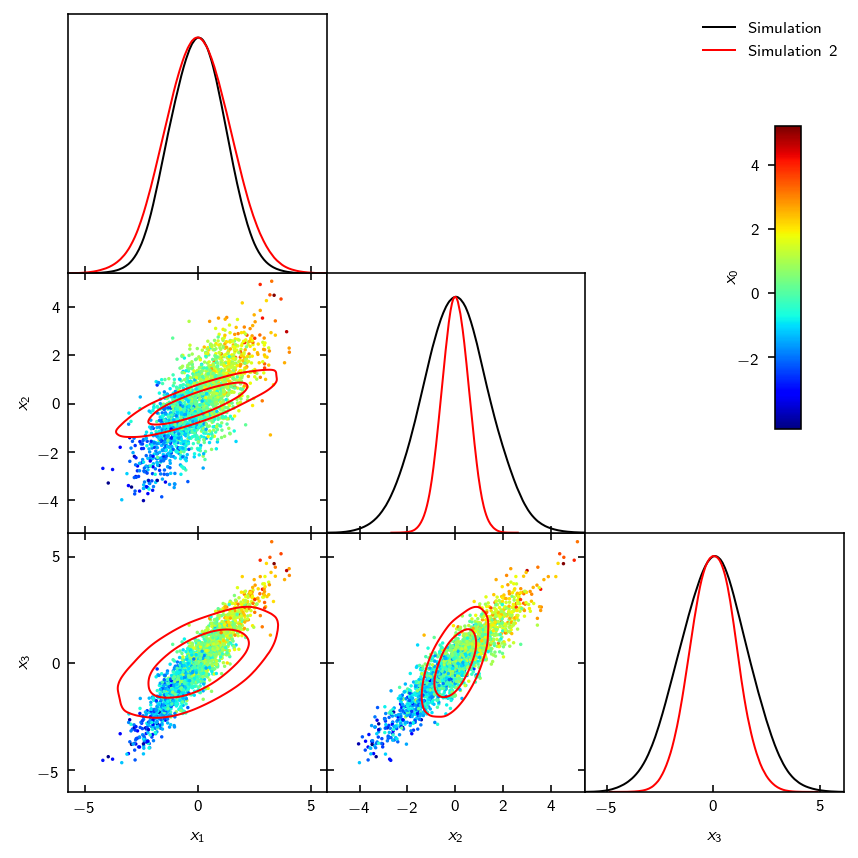

In [47]:
# getdist.styles.planck is a more complicated case which also changes matplotlib style 
# (to use latex rendering and different fonts). It also turns of scaling by default so all
# fonts are fixed size.

from getdist.styles.planck import style_name
plots.set_active_style(style_name)

g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([samples, samples2], ['x1', 'x2', 'x3'], 
                plot_3d_with_param='x0', legend_labels=['Simulation', 'Simulation 2'])

In [48]:
# Back to default style
plots.set_active_style();

**Getting consistent sizes for publication**

By default, font and line sizes are scaled for small plots, which is often necessary if making
figures with many subplots in. Setting parameters like settings.fontsizes, settings.axes_labelsize are specified at a reference axis size (defaul 3.5 inches); for smaller plots they are reduced.
For publication you may wish to have constent font sizes between figures, and hence specify fixed sizes and use a fixed figure size.

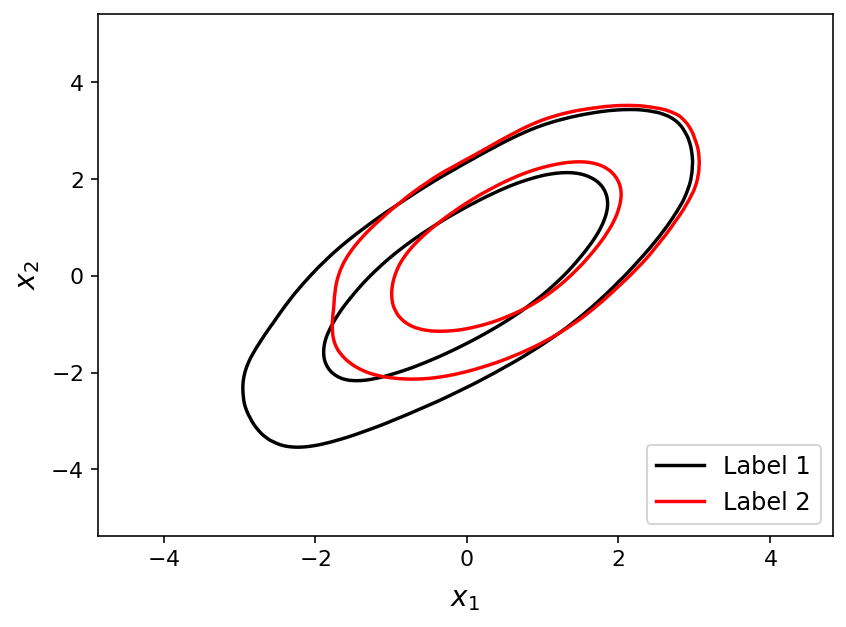

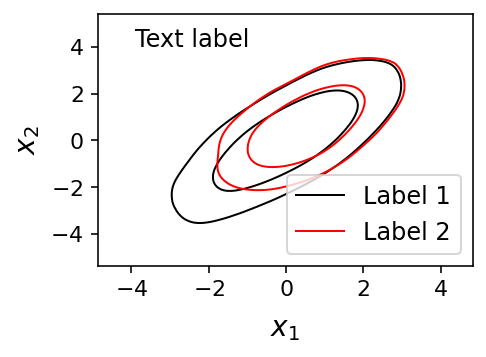

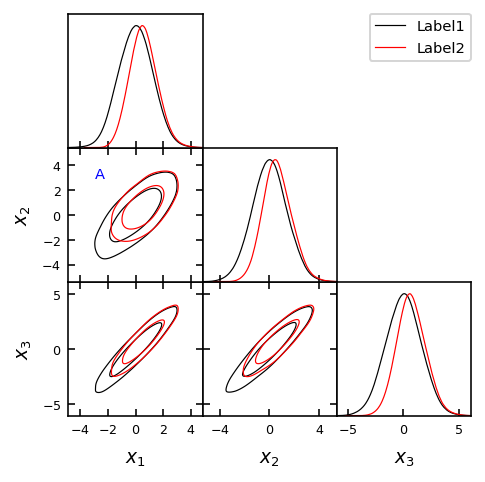

In [49]:
# width_inch=3.5 is often good for a one-column figure.
# If we make one figure or multiple subplots, by deafult font sizes will 
# be different for smaller axis sizes
g = plots.get_single_plotter(width_inch=6)
g.plot_2d([samples, cut_samples],['x1','x2'])
g.add_legend(['Label 1', 'Label 2'], legend_loc='lower right')
# finish_plot will call tight_layout to make sure everything is 
# actually within the requested figure size, so plots saved at consistent size

g = plots.get_single_plotter(width_inch=3.5)
g.plot_2d([samples, cut_samples],['x1','x2'])
g.add_legend(['Label 1', 'Label 2'], legend_loc='lower right')
g.add_text('Text label',0.1,0.9)

g = plots.get_subplot_plotter(width_inch=3.5)
g.triangle_plot([samples, cut_samples],['x1','x2','x3'], legend_labels=['Label1', 'Label2'])
g.add_text('A',0.2, 0.8, ax=g.subplots[1,0], color='blue')
# finish_plot is not needed for commands which generate sets of subplots

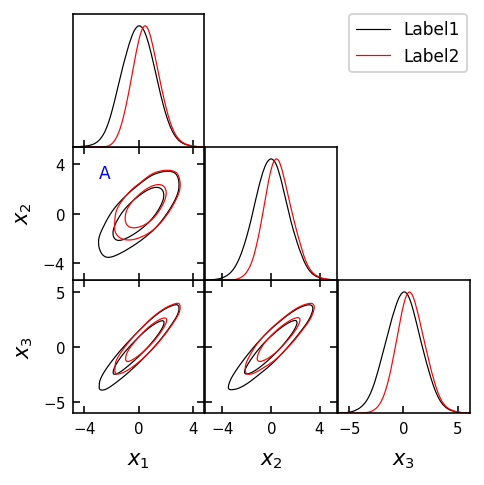

In [50]:
# The scaling_factor determines how quickly fonts shrink (default 2).
# Using scaling_factor=1 will give somewhat larger font sizes after scaling
g = plots.get_subplot_plotter(width_inch=3.5)
g.settings.scaling_factor = 1.5
g.triangle_plot([samples, cut_samples],['x1','x2','x3'], legend_labels=['Label1', 'Label2'])
g.add_text('A',0.2, 0.8, ax=g.subplots[1,0], color='blue')

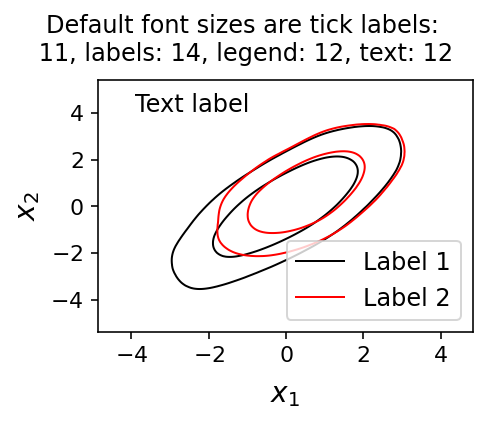

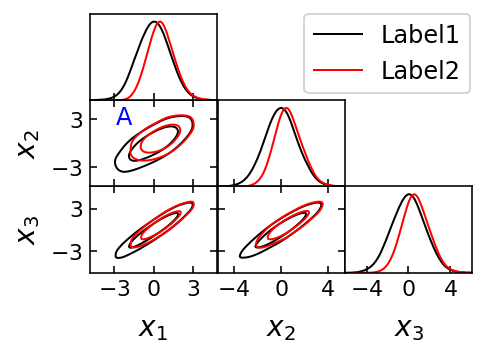

In [51]:
# Scaling is entirely disabled by setting settings.scaling=False or 
# getting the plotter instance using scaling=False. 
# Here font sizes and line widths are all consistent:

g = plots.get_single_plotter(width_inch=3.5, scaling=False)
g.plot_2d([samples, cut_samples],['x1','x2'])
g.add_text('Text label',0.1,0.9)
g.add_legend(['Label 1', 'Label 2'], legend_loc='lower right')
plt.suptitle('Default font sizes are tick labels:\n %.2g, labels: %.2g, legend: %.2g, text: %.2g'%
      (g.settings.axes_fontsize,g.settings.axes_labelsize,
       g.settings.legend_fontsize, g.settings.fontsize), va='bottom');

g.triangle_plot([samples, cut_samples],['x1','x2','x3'], legend_labels=['Label1', 'Label2'])
g.add_text('A',0.2, 0.8, ax=g.subplots[1,0], color='blue')

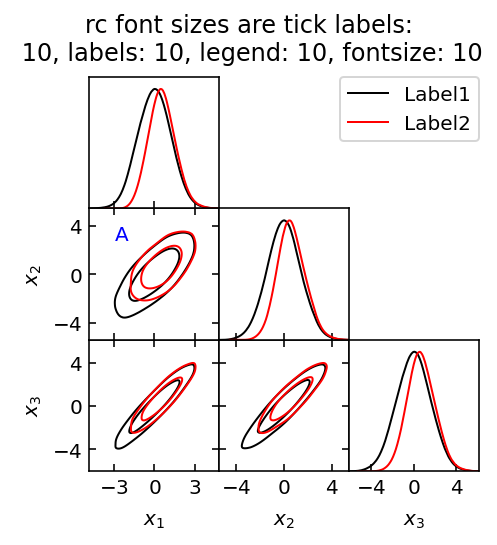

In [52]:
# You can also set default font settings to the values set in your rcParams
g = plots.get_subplot_plotter(width_inch=3.5, scaling=False, rc_sizes=True)
g.triangle_plot([samples, cut_samples],['x1','x2','x3'], legend_labels=['Label1', 'Label2'])
g.add_text('A', 0.2, 0.8, ax=('x1','x2'), color='blue')
plt.suptitle('rc font sizes are tick labels:\n %.2g, labels: %.2g, legend: %.2g, fontsize: %.2g'%
      (g.settings.axes_fontsize,g.settings.axes_labelsize,
       g.settings.legend_fontsize, g.settings.fontsize), va='bottom');


---
**Controlling analysis settings**

The default kernel density estimation setting usually give good results, but note that contours can seem quite smooth even if the residual sampling noise is quite large. You can change the [analysis settings](https://getdist.readthedocs.io/en/latest/analysis_settings.html) from the default to visually inspect the stability of the result.

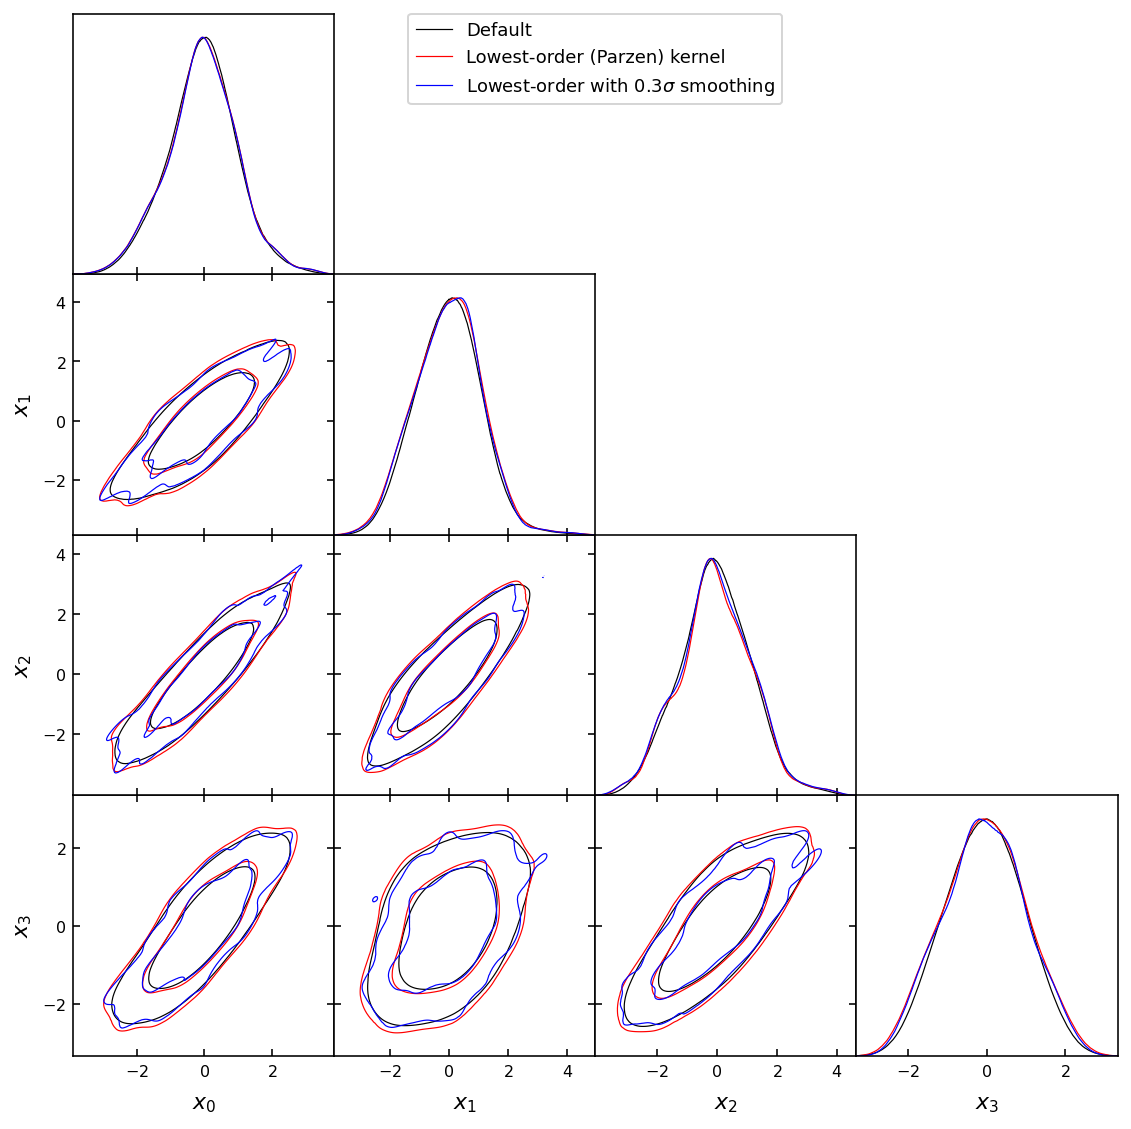

In [53]:
ndim = 4
nsamp = 400
A = random_state.random((ndim,ndim))
cov = np.dot(A, A.T)
samps = random_state.multivariate_normal([0]*ndim, cov, size=nsamp)
names = ["x%s"%i for i in range(ndim)]
labels =  ["x_%s"%i for i in range(ndim)]

# default settings attempt to minimize sampling noise and bias
s1 = MCSamples(samples=samps, names=names, labels=labels, label='Default')

# Use standard lowest-order kernel density estimates the contours get visually more noisy
# (and more biased). Kernel widths are determined automatically.
s2 = MCSamples(samples=samps, names=names, labels=labels, 
               label='Lowest-order (Parzen) kernel',
               settings={'mult_bias_correction_order':0})

# manually set the smoothing scale in units of the standard deviation
# Can also use copy() to generate a copy of samples with new settings 
s3 = s2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing', 
             settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})

g = plots.get_subplot_plotter()
g.triangle_plot([s1, s2, s3], filled=False)

# Note that for some flat distributions the location of 2D equal-enclosed-probability contours can 
# be very unstable, e.g. a flat bounded distribution 0<x<1, 0<y<1 any contours drawn based on random
# samples will be completely dependent on sampling noise.

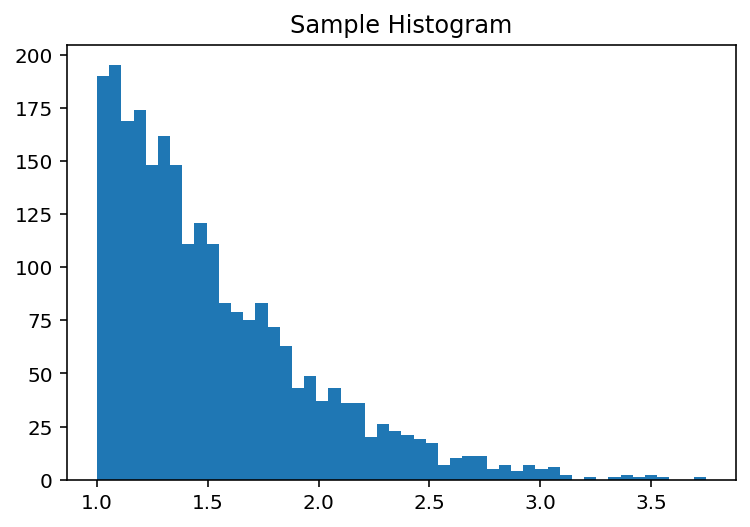

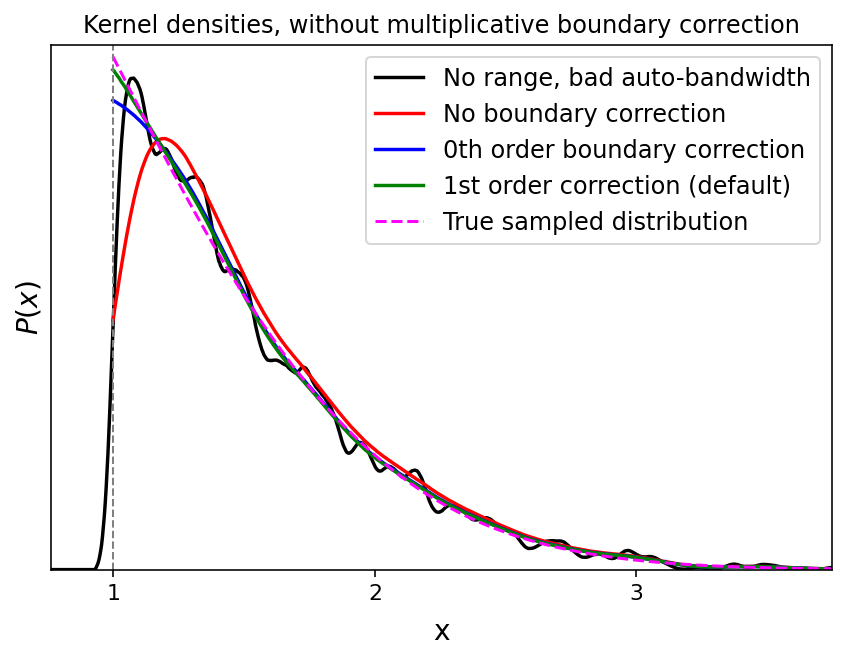

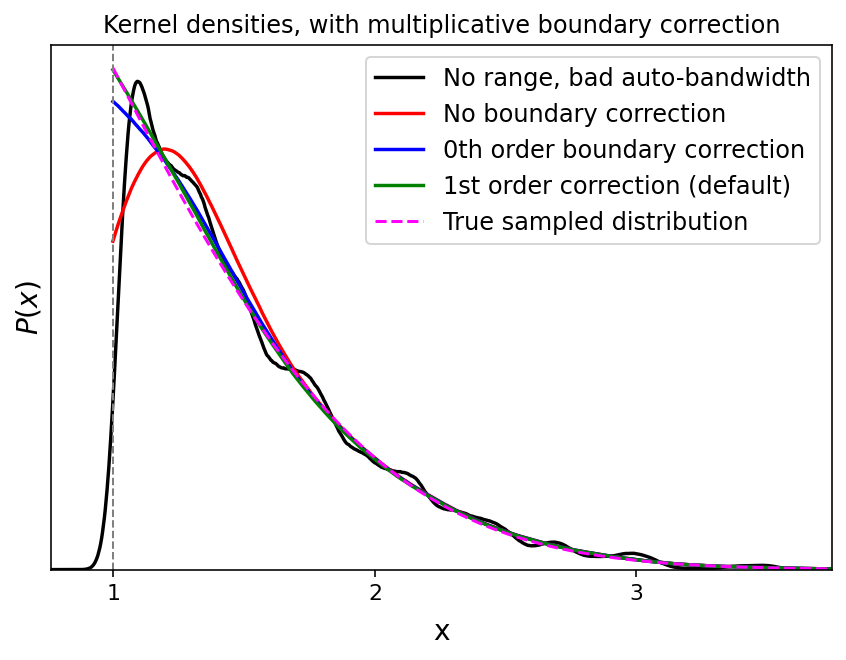

In [54]:
# You can also change the boundary correction settings
# Note it is important to set ranges for any parameters with known hard prior cuts.
# Note also there's no guarantee in particular random samples that higher-order is better
random_state = np.random.default_rng(2)
samps = random_state.standard_normal(size=15000) #lots because cutting
xcut=1
samps = samps[samps>xcut]
plt.figure(figsize=(6,4))
plt.hist(samps, bins=50)
plt.title('Sample Histogram')

for mult_order in [0,1]:

    # Incorrectly set samples without specifying the prior range
    no_range = MCSamples(samples=samps, names=['x'],
                         settings = {'mult_bias_correction_order':mult_order})

    # For parameters with hard priors you must specify the range, here p>xcut by definition
    with_range = MCSamples(samples=samps, names=['x'],
                           settings = {'mult_bias_correction_order':mult_order}, 
                           ranges={'x':[xcut,None]})

    snone=with_range.copy(settings={'boundary_correction_order':-1, 
                                    'mult_bias_correction_order':mult_order})
    s0=with_range.copy(settings={'boundary_correction_order':0, 
                                 'mult_bias_correction_order':mult_order})

    g = plots.get_single_plotter(width_inch=6)
    g.settings.norm_prob_label = '$P(x)$'
    g.plot_1d([no_range, snone, s0, with_range], 'x', normalized=True)

    #Plot true distribution (normalized to peak 1)
    x=np.arange(xcut,5,0.01)
    dist=np.exp(-x**2/2+xcut**2/2)
    dist/=np.sum(dist)*0.01
    g.get_axes().plot(x,dist, ls='--', color='magenta')
    g.add_x_marker(xcut, lw=1)
    plt.title('Kernel densities, %s multiplicative boundary correction'%(
                                      'with' if mult_order else 'without'))
    g.add_legend(legend_labels=['No range, bad auto-bandwidth','No boundary correction',
                                '0th order boundary correction', '1st order correction (default)',
                                'True sampled distribution'], legend_loc='upper right');

***
**Further Reading**

See the full [documentation](http://getdist.readthedocs.org/en/latest/index.html) for further details and examples